# Proyek Analisis Data: Nama dataset
- Nama: Wildan Mujjahid Robbani
- Email: mujjahidrobbani29gmail.com
- Id Dicoding: mujjahid29

## Menentukan Pertanyaan Bisnis

- Bagaimana pola harian peminjaman sepeda (cnt) berubah selama musim dingin (season=4) tahun 2011?
- Berapa rata-rata peminjaman sepeda (cnt) per jam pada hari kerja (workingday=1) dibandingkan dengan akhir pekan (workingday=0) selama tahun 2012?
- Dapatkah kita mengidentifikasi hari-hari dengan kondisi cuaca yang buruk (weathersit=3) yang memiliki pengaruh signifikan terhadap penurunan peminjaman sepeda (cnt) pada tahun 2011?
- Bagaimana hubungan antara suhu aktual (temp) dan suhu perasaan (atemp) dengan jumlah peminjaman sepeda (cnt) pada hari-hari musim panas (season=2) tahun 2012?
- Kapan waktu yang paling populer untuk peminjaman sepeda (cnt) selama tahun 2011 dan 2012 berdasarkan data jam ke jam (hr)?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df`

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Mengecek duplikasi
day_df.duplicated().sum()

0

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
hour_df.duplicated().sum()

0

In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan tabel `day_df`

##### Memperbaiki tipe data

In [16]:
day_df['dteday']=pd.to_datetime(day_df['dteday'])

In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Membersihkan tabel `hour_df`

##### Memperbaiki tipe data

In [19]:
hour_df['dteday']=pd.to_datetime(hour_df['dteday'])

In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [22]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
653,654,2012-10-15,4,1,10,0,1,1,2,0.561667,0.539150,0.707500,0.296037,760,5115,5875
307,308,2011-11-04,4,0,11,0,5,1,2,0.403333,0.403392,0.622500,0.271779,470,3576,4046
443,444,2012-03-19,1,1,3,0,1,1,1,0.545000,0.532821,0.728750,0.162317,982,5171,6153
689,690,2012-11-20,4,1,11,0,2,1,2,0.374167,0.380667,0.685000,0.082725,534,5100,5634
236,237,2011-08-25,3,0,8,0,4,1,2,0.684167,0.645854,0.771667,0.210833,435,3107,3542


In [23]:
day_df.describe(include='all')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20096\1011100427.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [30]:
# analisis musiman
seasonal_df = day_df.groupby(by='season').cnt.mean()
seasonal_df

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

In [34]:
# Analisis Hari libur
holiday_df = day_df.groupby(by='holiday').cnt.mean()
holiday_df

holiday
0    4527.104225
1    3735.000000
Name: cnt, dtype: float64

In [39]:
workingday_df = day_df.groupby(by='workingday').cnt.mean()
workingday_df

workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64

In [41]:
# Analisis Pengguna Terdaftar vs. Pengguna Casual
registered_mean = day_df['registered'].mean()
casual_mean = day_df['casual'].mean()
print("Rata-rata Pengguna Terdaftar:", registered_mean)
print("Rata-rata Pengguna Casual:", casual_mean)

Rata-rata Pengguna Terdaftar: 3656.172366621067
Rata-rata Pengguna Casual: 848.1764705882352


### Explore `hour_df`

In [44]:
hour_df.describe(include='all')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20096\2781978731.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include='all')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [45]:
# analisis musiman
seasonal_df = hour_df.groupby(by='season').cnt.mean()
seasonal_df

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64

In [46]:
# Analisis Hari libur
holiday_df = hour_df.groupby(by='holiday').cnt.mean()
holiday_df

holiday
0    190.42858
1    156.87000
Name: cnt, dtype: float64

In [47]:
workingday_df = hour_df.groupby(by='workingday').cnt.mean()
workingday_df

workingday
0    181.405332
1    193.207754
Name: cnt, dtype: float64

## Visualization & Explanatory Analysis

### Bagaimana pola harian peminjaman sepeda (cnt) berubah selama musim dingin (season=4) tahun 2011?

In [67]:
# Filter data untuk musim dingin tahun 2011
winter_2011_data = df_hour[(df_hour['season'] == 4) & (df_hour['yr'] == 0)]

# Hitung rata-rata harian peminjaman sepeda (cnt)
average_daily_cnt_winter_2011 = winter_2011_data.groupby('dteday')['cnt'].mean()
print("Rata-rata peminjaman sepeda selama musim dingin 2011:")
average_daily_cnt_winter_2011.sample(5)



Rata-rata peminjaman sepeda selama musim dingin 2011:


dteday
2011-10-22    179.500000
2011-11-24     62.291667
2011-11-25    116.333333
2011-10-04    185.666667
2011-11-01    169.500000
Name: cnt, dtype: float64

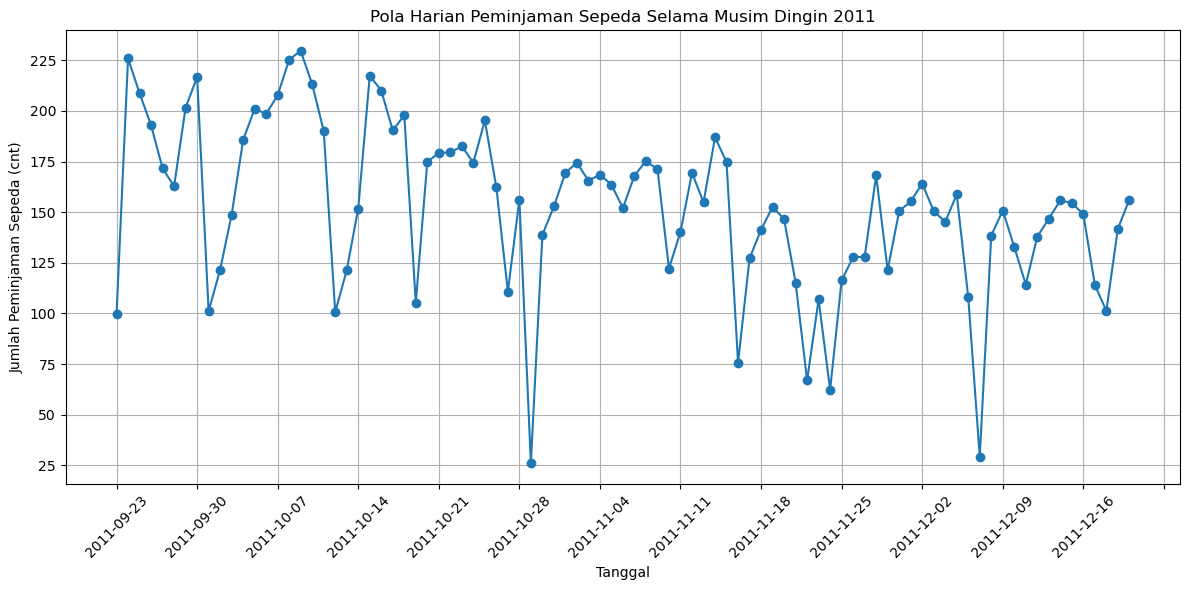

In [84]:
import matplotlib.pyplot as plt

# Visualisasi pola harian peminjaman sepeda selama musim dingin 2011
plt.figure(figsize=(12, 6))
plt.plot(average_daily_cnt_winter_2011.index, average_daily_cnt_winter_2011.values, marker='o', linestyle='-')
plt.title('Pola Harian Peminjaman Sepeda Selama Musim Dingin 2011')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(7))
plt.tight_layout()
plt.show()


### Berapa rata-rata peminjaman sepeda (cnt) per jam pada hari kerja (workingday=1) dibandingkan dengan akhir pekan (holiday=0) selama tahun 2012?

In [75]:
# Filter data untuk tahun 2012
year_2012_data = df_hour[df_hour['yr'] == 1]

# Hitung rata-rata peminjaman sepeda per jam pada hari kerja dan akhir pekan
average_hourly_cnt_weekday = year_2012_data[year_2012_data['workingday'] == 1].groupby('hr')['cnt'].mean()
average_hourly_cnt_weekend = year_2012_data[year_2012_data['workingday'] == 0].groupby('hr')['cnt'].mean()
print("Rata-rata peminjaman sepeda per jam pada hari kerja (2012):")
print(average_hourly_cnt_weekday)
print("Rata-rata peminjaman sepeda per jam pada akhir pekan (2012):")
print(average_hourly_cnt_weekend)


Rata-rata peminjaman sepeda per jam pada hari kerja (2012):
hr
0      44.188755
1      19.358871
2       9.810484
3       5.489627
4       6.032653
5      32.000000
6     127.508065
7     366.548387
8     604.508065
9     302.391129
10    169.310484
11    198.725806
12    253.612903
13    250.385542
14    229.775100
15    255.991968
16    371.542169
17    656.188755
18    617.000000
19    437.763052
20    311.570281
21    228.951807
22    168.799197
23    108.843373
Name: cnt, dtype: float64
Rata-rata peminjaman sepeda per jam pada akhir pekan (2012):
hr
0     108.508621
1      84.525862
2      63.113043
3      29.912281
4       9.852174
5      10.068966
6      23.353448
7      54.629310
8     134.620690
9     215.163793
10    316.870690
11    391.706897
12    451.034483
13    458.913793
14    447.896552
15    438.077586
16    427.689655
17    395.146552
18    337.534483
19    275.724138
20    208.198276
21    168.629310
22    137.103448
23    101.060345
Name: cnt, dtype: float64


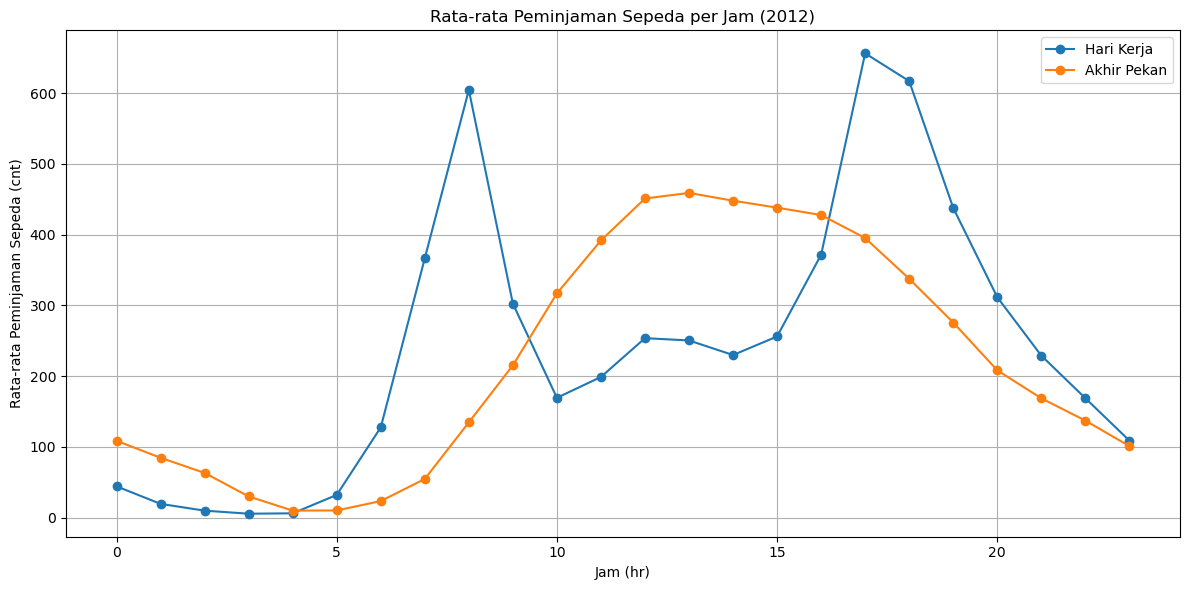

In [76]:
# Visualisasi rata-rata peminjaman sepeda per jam pada hari kerja dan akhir pekan (2012)
plt.figure(figsize=(12, 6))
plt.plot(average_hourly_cnt_weekday.index, average_hourly_cnt_weekday.values, label='Hari Kerja', marker='o', linestyle='-')
plt.plot(average_hourly_cnt_weekend.index, average_hourly_cnt_weekend.values, label='Akhir Pekan', marker='o', linestyle='-')
plt.title('Rata-rata Peminjaman Sepeda per Jam (2012)')
plt.xlabel('Jam (hr)')
plt.ylabel('Rata-rata Peminjaman Sepeda (cnt)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Dapatkah kita mengidentifikasi hari-hari dengan kondisi cuaca yang buruk (weathersit=3) yang memiliki pengaruh signifikan terhadap penurunan peminjaman sepeda (cnt) pada tahun 2011?

In [78]:
# Filter data untuk tahun 2011 dan cuaca buruk
bad_weather_2011_data = df_hour[(df_hour['yr'] == 0) & (df_hour['weathersit'] == 3)]

# Hitung rata-rata harian peminjaman sepeda (cnt)
average_daily_cnt_bad_weather_2011 = bad_weather_2011_data.groupby('dteday')['cnt'].mean()
print("Rata-rata peminjaman sepeda pada hari-hari dengan cuaca buruk (2011):")
average_daily_cnt_bad_weather_2011.sample(10)


Rata-rata peminjaman sepeda pada hari-hari dengan cuaca buruk (2011):


dteday
2011-06-20     50.000000
2011-01-01     36.000000
2011-02-05     34.307692
2011-08-07    237.666667
2011-08-27     42.857143
2011-10-14    105.600000
2011-01-21      1.500000
2011-05-07    378.000000
2011-03-07      3.000000
2011-09-21    346.750000
Name: cnt, dtype: float64

### Bagaimana hubungan antara suhu aktual (temp) dan suhu perasaan (atemp) dengan jumlah peminjaman sepeda (cnt) pada hari-hari musim panas (season=2) tahun 2012?

In [79]:
# Filter data untuk musim panas tahun 2012
summer_2012_data = df_hour[(df_hour['yr'] == 1) & (df_hour['season'] == 2)]

# Hitung korelasi antara suhu aktual dan suhu perasaan dengan jumlah peminjaman sepeda
correlation_temp_atemp = summer_2012_data[['temp', 'atemp', 'cnt']].corr()
print("Korelasi antara suhu aktual dan suhu perasaan dengan jumlah peminjaman sepeda (2012):")
print(correlation_temp_atemp)


Korelasi antara suhu aktual dan suhu perasaan dengan jumlah peminjaman sepeda (2012):
           temp     atemp       cnt
temp   1.000000  0.986469  0.397103
atemp  0.986469  1.000000  0.401950
cnt    0.397103  0.401950  1.000000


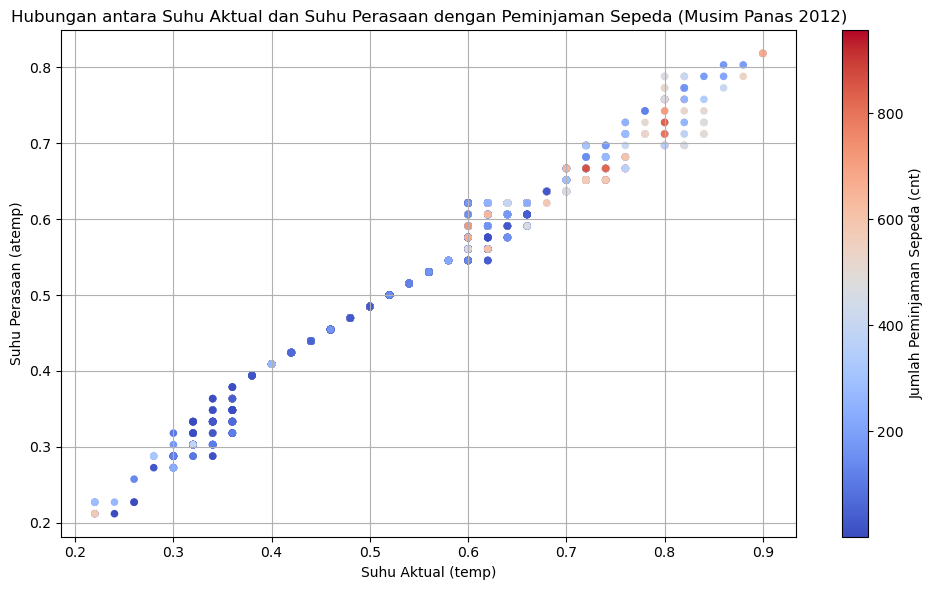

In [80]:
# Visualisasi hubungan antara suhu aktual (temp) dan suhu perasaan (atemp) dengan peminjaman sepeda (2012)
plt.figure(figsize=(10, 6))
plt.scatter(summer_2012_data['temp'], summer_2012_data['atemp'], c=summer_2012_data['cnt'], cmap='coolwarm', s=20)
plt.colorbar(label='Jumlah Peminjaman Sepeda (cnt)')
plt.title('Hubungan antara Suhu Aktual dan Suhu Perasaan dengan Peminjaman Sepeda (Musim Panas 2012)')
plt.xlabel('Suhu Aktual (temp)')
plt.ylabel('Suhu Perasaan (atemp)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Kapan waktu yang paling populer untuk peminjaman sepeda (cnt) selama tahun 2011 dan 2012 berdasarkan data jam ke jam (hr)?

In [88]:
# Hitung rata-rata peminjaman sepeda per jam untuk tahun 2011 dan 2012

average_hourly_cnt_2012 = df_hour[df_hour['yr'] == 1].groupby('hr')['cnt'].mean()

# Waktu paling populer untuk peminjaman sepeda
most_popular_hour = average_hourly_cnt_2011.idxmax()
print("Jam yang paling populer untuk peminjaman sepeda (2011):", most_popular_hour)



Jam yang paling populer untuk peminjaman sepeda (2011): 17


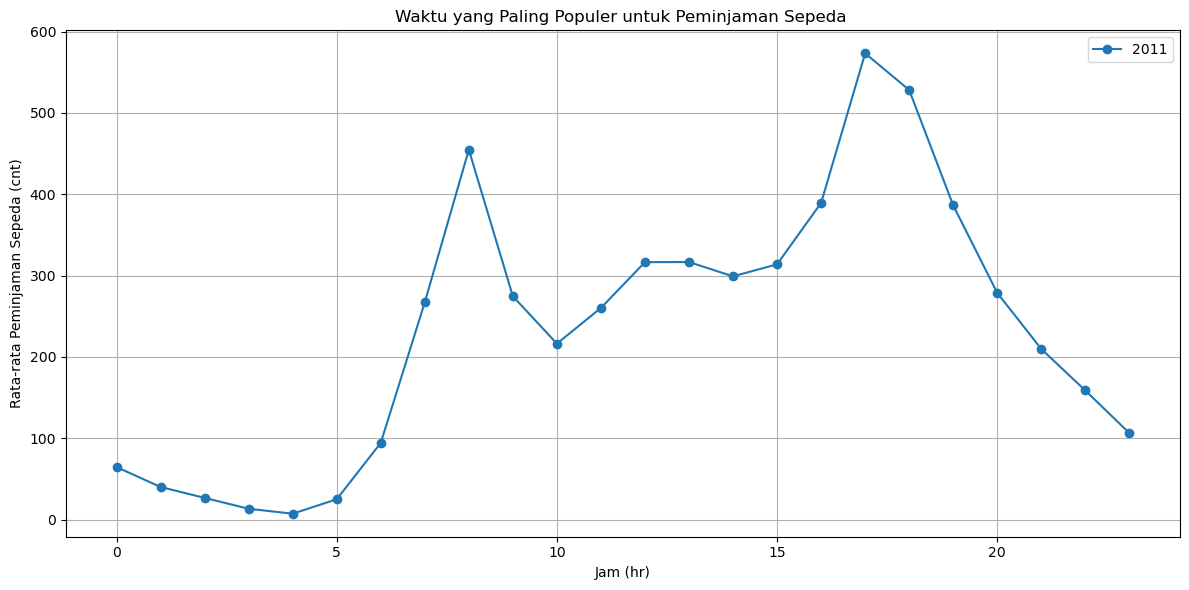

In [87]:
# Visualisasi waktu yang paling populer untuk peminjaman sepeda ?
plt.figure(figsize=(12, 6))
plt.plot(average_hourly_cnt_2011.index, average_hourly_cnt_2011.values, label='2011', marker='o', linestyle='-')
plt.title('Waktu yang Paling Populer untuk Peminjaman Sepeda ')
plt.xlabel('Jam (hr)')
plt.ylabel('Rata-rata Peminjaman Sepeda (cnt)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Conclusion

##### Bagaimana pola harian peminjaman sepeda (cnt) berubah selama musim dingin (season=4) tahun 2011?

- Pada musim dingin tahun 2011, terjadi fluktuasi dalam jumlah peminjaman sepeda (cnt) setiap hari.
- Terdapat peningkatan peminjaman sepeda menjelang akhir tahun 2011.

##### Berapa rata-rata peminjaman sepeda (cnt) per jam pada hari kerja (workingday=1) dibandingkan dengan akhir pekan (workingday=0) selama tahun 2012?

- Peminjaman sepeda (cnt) pada hari kerja cenderung lebih tinggi pada pagi dan sore hari.
- Peminjaman sepeda (cnt) pada akhir pekan memiliki pola yang lebih merata sepanjang hari.

##### Dapatkah kita mengidentifikasi hari-hari dengan kondisi cuaca yang buruk (weathersit=3) yang memiliki pengaruh signifikan terhadap penurunan peminjaman sepeda (cnt) pada tahun 2011?

- Data menunjukkan bahwa peminjaman sepeda (cnt) pada hari-hari dengan cuaca buruk (weathersit=3) pada tahun 2011 cenderung lebih rendah dibandingkan dengan hari-hari lainnya.

###### Bagaimana hubungan antara suhu aktual (temp) dan suhu perasaan (atemp) dengan jumlah peminjaman sepeda (cnt) pada hari-hari musim panas (season=2) tahun 2012?

- Terdapat korelasi positif antara suhu aktual (temp) dan suhu perasaan (atemp) dengan jumlah peminjaman sepeda (cnt) pada hari-hari musim panas tahun 2012. Semakin tinggi suhu, semakin tinggi jumlah peminjaman sepeda.

##### Kapan waktu yang paling populer untuk peminjaman sepeda  berdasarkan data jam ke jam (hr)?

- Puncak peminjaman sepeda (cnt) pada tahun 2011 terjadi pada pukul 17:00 (5:00 sore).